# EDA Sleep Health
`수면건강과 생활습관 데이터셋` 에 대한 분석을 통해 생활패턴과 수면 퀄리티간 관계에 대해 분석해본다.

## 필요 Package 로드

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 한국어 처리
import matplotlib
import matplotlib.font_manager as fm

# Window
font_path = "C:\\Windows\\Fonts\\malgun.ttf"
# Mac
# font_path = "/System/Library/Fonts/Supplemental/Arial Unicode.ttf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

## 데이터 수집 및 로드

In [42]:
df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


## 데이터 구조 및 변수 이해

In [43]:
print(df.shape  , end="\n---------------------------------\n")
print(df.info() , end="\n---------------------------------")

(374, 13)
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
m

| image                                   | description                                                                |
|:----------------------------------------|:---------------------------------------------------------------------------|
|| 데이터는 *`13개`* 의 특성을 가진 *`374개`* 의 레코드로 이루어져있다.                              |
| ![](images/jh_01_sleep_disorder_as_none.jpg)  | `Sleep Disorder` 의 결측치는 _질병이 없다_ 는 의미이므로 결측치 처리 시 _`"None"`_ 으로 처리하는게 좋겠다. |
| ![](images/jh_02_blood_pressure_divide.jpg)   | `Blood Pressure` 는 최고/최저 수치가 모여있으므로 `BP high` 와 `BP low` 로 분리해야겠다.         |
| ![](images/jh_03_category_to_number.jpg)      | 그 밖에 범주형 데이터들은 수치형으로 변환한다.                                                 |
| ![](images/jh_04_person_id_delete.jpg)        | 전처리가 완료되면, 복사본 DF 를 만들고 `Person ID` 항목을 제거하고 보는게 좋겠다.                      |

## 데이터 요약 및 기술통계

In [44]:
# 수치형 데이터를 위한 describe() 결과
display(df.describe())

# 범주형 데이티를 위한 value_counts() 결과
print(df.value_counts('Gender')         , end='\n----------------------------------\n')
print(df.value_counts('Occupation')     , end='\n----------------------------------\n')
print(df.value_counts('BMI Category')   , end='\n----------------------------------\n')
print(df.value_counts('Blood Pressure') , end='\n----------------------------------\n')
print(df.value_counts('Sleep Disorder') , end='\n----------------------------------\n')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Gender
Male      189
Female    185
Name: count, dtype: int64
----------------------------------
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
----------------------------------
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
----------------------------------
Blood Pressure
130/85    99
125/80    65
140/95    65
120/80    45
115/75    32
135/90    27
125/82     4
140/90     4
132/87     3
128/85     3
130/86     2
126/83     2
129/84     2
117/76     2
118/75     2
115/78     2
119/77     2
135/88     2
131/86     2
139/91     2
128/84     2
142/92     2
122/80     1
118/76     1
121/79     1
Name: count, dtype: int64
-----------

## 결측치, 이상치 탐지
각 컬럼에서 결측치와 이상치, 데이터 형태 등을 확인해봐야겠다.
1. 결측치는 isna().sum() 으로 보면 쉽게 파악할수 있을것 같다.
2. 이상치는 boxplot 을 그려보면 쉽게 파악할 수 있을것 같다.

In [45]:
print("컬럼별 정상치 개수" , end="\n---------------------------------\n")
print(df.info()            , end="\n---------------------------------\n")
print("결측치 개수"        , end="\n---------------------------------\n")
print(df.isna().sum()      , end="\n---------------------------------\n")

컬럼별 정상치 개수
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)


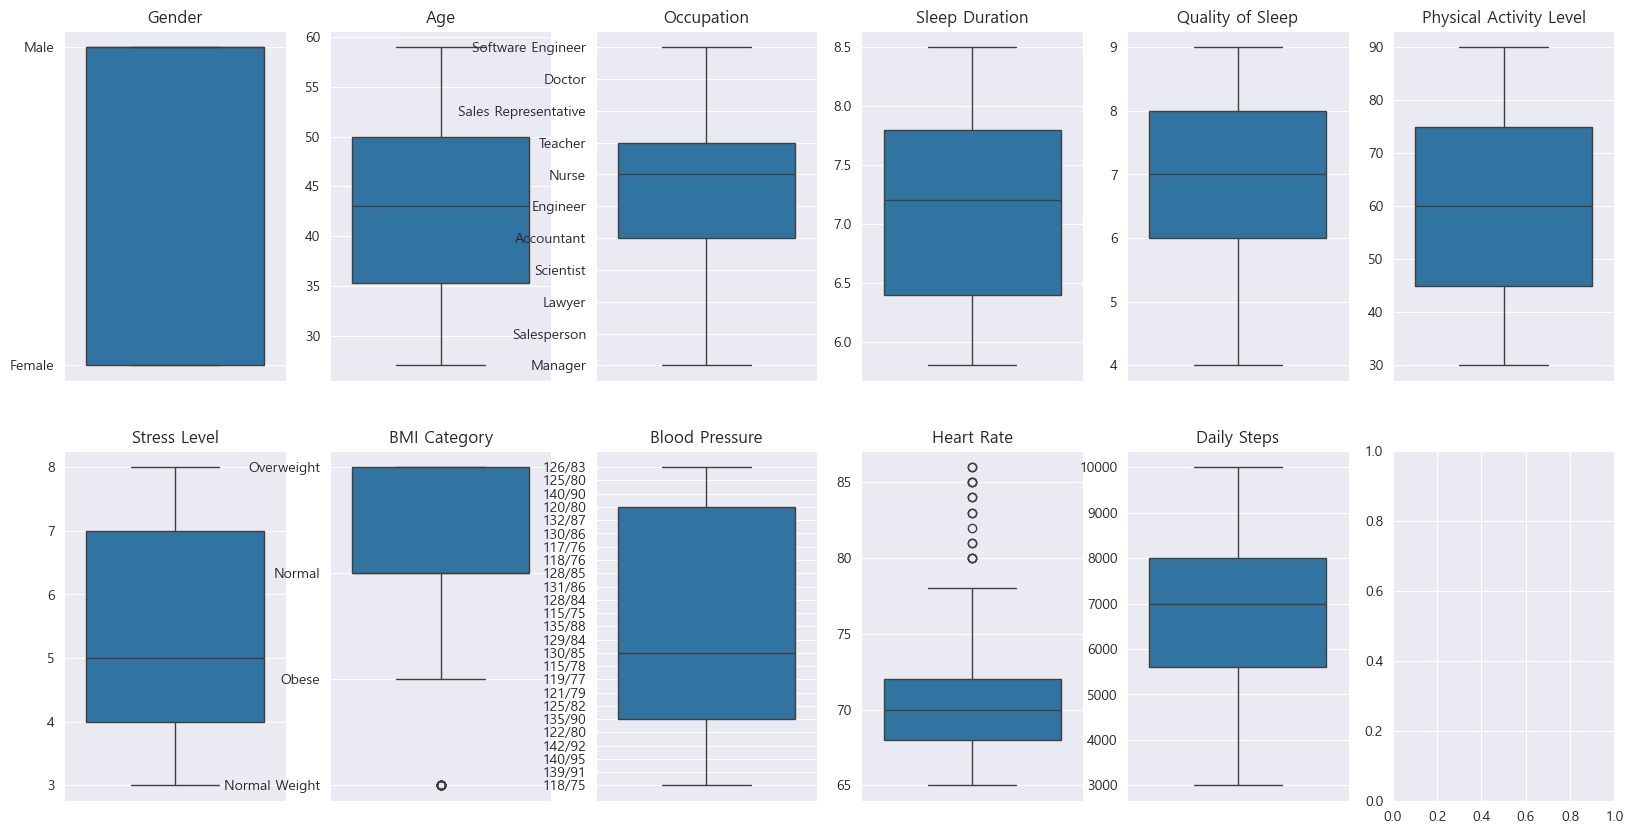

In [46]:
fig, ax = plt.subplots(2,6)
fig.set_figwidth(20)
fig.set_figheight(10)

for i,col in enumerate(df.iloc[:, 1:12].columns):
	_ax = ax[i//6, i%6]
	sns.boxplot(df, y=col, ax=_ax)
	_ax.set(ylabel="", title=col)

plt.show()

| image                                      | description                                                                                                                          |
|--------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------|
| ![](images/jh_05_isna_check.jpg)           | `Sleep Disorder` 외엔 결측치에 대해서는 걱정할 필요가 없어보인다.                                                                                         |
| ![](images/jh_06_gender_cnt_n_boxplot.jpg) | `Gender` 는 그래프 모양은 좀 이상해도, Mail/Female 로 잘 나뉘어있으므로 라벨링만 추가로 조치해야겠다.                                                                  |
| ![](images/jh_07_bmi_category_cnt.jpg)     | `BMI Category` 는 범주형 데이터이므로 이상치보다는 분포를 확인하는 것이 더 좋겠다.<br/>`BMI Category`에서 _`"Normal"`_ 과 _`"Normal Weight"`_ 의 차이를 구별할 만한 기준이 부족하다. |
| ![](images/jh_08_blood_pressure_boxplot.jpg)                               | `Blood Pressuer` 는 계획대로 분리한 다음 다시 확인이 필요하다.                                                                                          |
| ![](images/jh_09_heart_rate_abnormal.jpg)                               | `Heart Rate` 는 이상치가 있는걸까? 다른 시각화 툴을 이용해 추가 확인이 필요하다.                                                                                 |

- `Heart Rate` 는 60~100 범주라면 정상범위로 볼 수 있다.
    - `대부분의 데이터가 IQR 범위`에 몰려있어서 나타난 현상으로 보인다.
- 그 외 데이터들은 탐지한 결측치/이상치에 대하여 전처리를 진행한다.
  1. `Person ID` 는 drop
  2. `Sleep Disorder` 의 결측치는 _`"None"`_ 으로 처리
  3. `Blood Pressure` 의 분리
  4. 연속형 특성들을 범주화.
  5. 범주화 특성들의 라벨링

##  변수분포 시각화

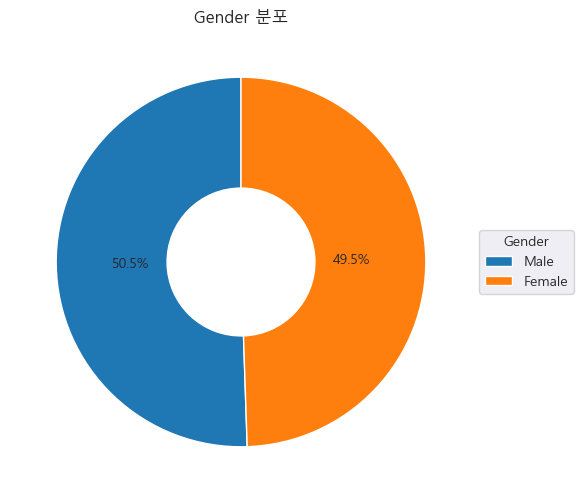

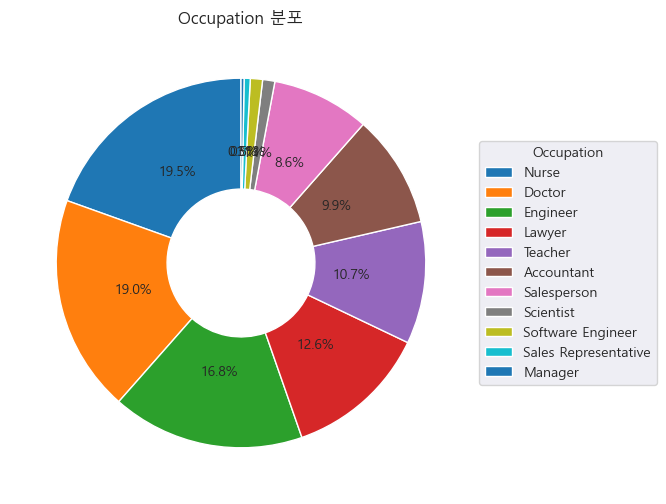

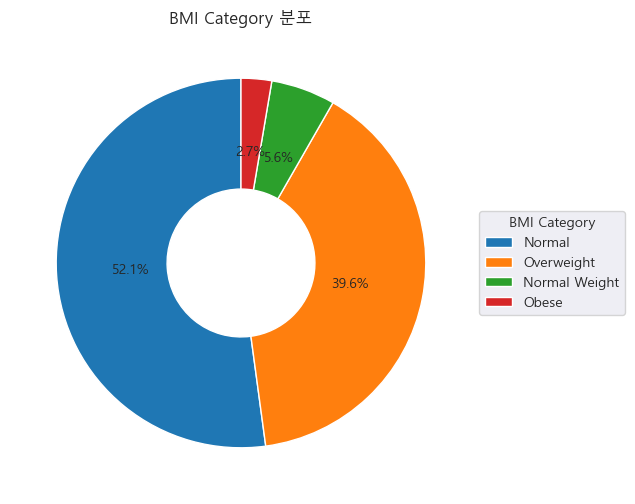

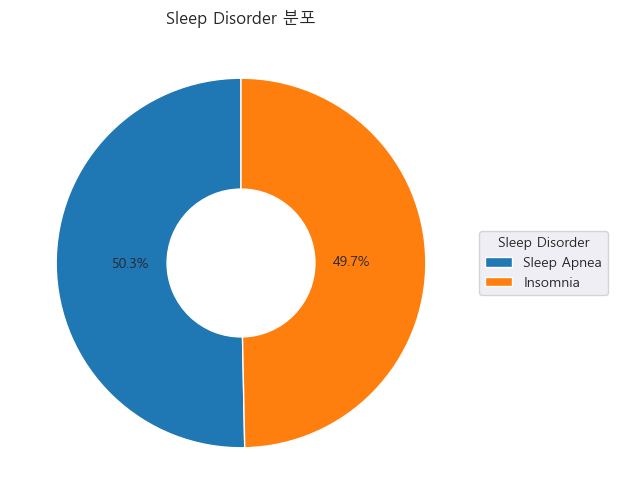

In [47]:
# 범주형 데이터 분리 (Blood Pressure 제외)
cat_cols = df.select_dtypes(include=['object']).columns.drop('Blood Pressure')

for col in cat_cols:
    plt.figure(figsize=(6, 6))
    values = df[col].value_counts()
    wedges, texts, autotexts = plt.pie(
        values,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.6)
    )
    plt.title(f"{col} 분포")
    plt.legend(wedges, values.index, title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [48]:
# Person ID 는 drop
df.drop(columns=["Person ID"], inplace=True)

# Sleep Disorder 의 결측치는 "None" 으로 처리
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")

# Blood Pressure 의 분리
def bp_high(bp):	return bp.split("/")[0]
def bp_low(bp): 	return bp.split("/")[1]
df["BP high"] = df["Blood Pressure"].apply(bp_high).astype(int)
df["BP low"]  = df["Blood Pressure"].apply(bp_low).astype(int)

# 연속형 특성들의 범주화
# `Age`, `BP high`, `BP low`, `Heart Rate`, `Daily Steps`, `Sleep Duration`, `Physical Activity Level`
grouping = lambda x : x // 10
df["Age Group"]             = df["Age"]                     .apply(grouping)
df["BP high Group"]         = df["BP high"]                 .apply(grouping)
df["BP low Group"]          = df["BP low"]                  .apply(grouping)
df["Heart Rate Group"]      = df["Heart Rate"]              .apply(grouping)
df["Daily Steps Group"]     = df["Daily Steps"]             .apply(lambda x : x // 1000)
df["PhAL Group"]            = df["Physical Activity Level"] .apply(grouping)
df["Sleep Duration Group"]  = (df["Sleep Duration"] + 0.5).truncate(0).astype(int)

# 라벨링되지 못한 잔여 범주화 특성들의 라벨링
# `Gender`, `Occupation`, `BMI Category`, `Sleep Disorder`
from sklearn.preprocessing import LabelEncoder
gender_encoder      = LabelEncoder()
occupation_encoder  = LabelEncoder()
bmi_encoder         = LabelEncoder()
disorder_encoder    = LabelEncoder()

df["Gender Label"]      = gender_encoder    .fit_transform(df["Gender"])
df["Occupation Label"]  = occupation_encoder.fit_transform(df["Occupation"])
df["BMI Label"]         = bmi_encoder       .fit_transform(df["BMI Category"])
df["Sleep Label"]       = disorder_encoder  .fit_transform(df["Sleep Disorder"])

print("gender Label : "     , gender_encoder.classes_)
print("Occupation Label : " , occupation_encoder.classes_)
print("BMI Label : "        , bmi_encoder.classes_)
print("Sleep Label : "      , disorder_encoder.classes_)

gender Label :  ['Female' 'Male']
Occupation Label :  ['Accountant' 'Doctor' 'Engineer' 'Lawyer' 'Manager' 'Nurse'
 'Sales Representative' 'Salesperson' 'Scientist' 'Software Engineer'
 'Teacher']
BMI Label :  ['Normal' 'Normal Weight' 'Obese' 'Overweight']
Sleep Label :  ['Insomnia' 'None' 'Sleep Apnea']


## 다른 방식의 데이터전처리

In [8]:
df_fe = df.copy() # Feature Engineering을 위한 새 데이터프레임 복사

df_fe['BMI Category'] = df_fe['BMI Category'].replace('Normal Weight', 'Normal')
print("'BMI Category' 값 통일 완료: 'Normal Weight' -> 'Normal'")

# Occupation 통일 (예: 'Salesperson' -> 'Sales Representative')
# inplace=True 대신 직접 할당
df_fe['Occupation'] = df_fe['Occupation'].replace('Salesperson', 'Sales Representative')
print("'Occupation' 값 통일 완료 (예시).")

'BMI Category' 값 통일 완료: 'Normal Weight' -> 'Normal'
'Occupation' 값 통일 완료 (예시).


## 다른 방식의 Feature Engineering

In [ ]:
df_fe = df.copy() # Feature Engineering을 위한 새 데이터프레임 복사 (항상 원본 df 사용)

# BMI Category 통일 (만약 원본 df에 'Normal Weight'가 있다면)
if 'Normal Weight' in df_fe['BMI Category'].unique():
    df_fe['BMI Category'] = df_fe['BMI Category'].replace('Normal Weight', 'Normal')
    print("'BMI Category' 값 통일 완료: 'Normal Weight' -> 'Normal'")

# 1. 혈압(Blood Pressure) 수치화 및 범주화
print("--- 1. 혈압 관련 파생 변수 생성 ---")
# Systolic (수축기) BP와 Diastolic (이완기) BP 분리
bp_split = df_fe['Blood Pressure'].str.split('/', expand=True)
df_fe['Systolic_BP'] = pd.to_numeric(bp_split[0])
df_fe['Diastolic_BP'] = pd.to_numeric(bp_split[1])
df_fe.drop('Blood Pressure', axis=1, inplace=True) # 원본 혈압 컬럼 제거
print("'Systolic_BP'와 'Diastolic_BP' 컬럼 생성 완료.")

# 평균 동맥압 (MAP) 계산
df_fe['MAP'] = df_fe['Diastolic_BP'] + (df_fe['Systolic_BP'] - df_fe['Diastolic_BP']) / 3
df_fe['MAP'] = df_fe['MAP'].round(2)
print("'MAP' (평균 동맥압) 컬럼 생성 완료.")

# 맥압 (Pulse Pressure) 계산
df_fe['Pulse_Pressure'] = df_fe['Systolic_BP'] - df_fe['Diastolic_BP']
print("'Pulse_Pressure' (맥압) 컬럼 생성 완료.")

# 혈압 범주 생성 (미국 심장 협회 기준 단순화 예시)
def categorize_bp(row):
    systolic  = row['Systolic_BP']
    diastolic = row['Diastolic_BP']
    if systolic < 120 and diastolic < 80:                   return '정상'
    elif 120 <= systolic <= 129 and diastolic < 80:         return '주의 혈압'
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:   return '고혈압 1단계'
    elif systolic >= 140 or diastolic >= 90:                return '고혈압 2단계'
    else:                                                   return '분류 불가' # 혹시 모를 예외 처리

df_fe['BP_Category'] = df_fe.apply(categorize_bp, axis=1)
print("'BP_Category' (혈압 범주) 컬럼 생성 완료.")
print(df_fe[['Systolic_BP', 'Diastolic_BP', 'MAP', 'Pulse_Pressure', 'BP_Category']].head())
print("\n" + "="*50 + "\n")


# 2. 수면 효율 관련 지표
print("--- 2. 수면 효율 관련 파생 변수 생성 ---")
# 수면 시간 대비 수면의 질 (Quality of Sleep / Sleep Duration)
# Sleep Duration이 0인 경우를 방지하기 위해 작은 값(epsilon)을 더하거나, 0인 경우를 처리
epsilon = 1e-6
df_fe['Sleep_Quality_per_Hour'] = df_fe['Quality of Sleep'] / (df_fe['Sleep Duration'] + epsilon)
df_fe['Sleep_Quality_per_Hour'] = df_fe['Sleep_Quality_per_Hour'].round(2)
print("'Sleep_Quality_per_Hour' 컬럼 생성 완료.")
print(df_fe[['Sleep Duration', 'Quality of Sleep', 'Sleep_Quality_per_Hour']].head())
print("\n" + "="*50 + "\n")


# 3. 스트레스 및 활동 관련 지표
print("--- 3. 스트레스 및 활동 관련 파생 변수 생성 ---")
# 스트레스 수준 대비 수면의 질 (Quality of Sleep / Stress Level)
# Stress Level이 0인 경우 방지
df_fe['Quality_per_Stress'] = df_fe['Quality of Sleep'] / (df_fe['Stress Level'] + epsilon)
df_fe['Quality_per_Stress'] = df_fe['Quality_per_Stress'].round(2)
print("'Quality_per_Stress' 컬럼 생성 완료.")

# 신체 활동 수준 대비 스트레스 수준 (Physical Activity Level / Stress Level)
df_fe['Activity_per_Stress'] = df_fe['Physical Activity Level'] / (df_fe['Stress Level'] + epsilon)
df_fe['Activity_per_Stress'] = df_fe['Activity_per_Stress'].round(2)
print("'Activity_per_Stress' 컬럼 생성 완료.")

# 일일 걸음 수 범주화
step_bins = [0, 4000, 7000, 10000, float('inf')]
step_labels = ['적음 (0-4k)', '보통 (4k-7k)', '활동적 (7k-10k)', '매우 활동적 (10k+)']
df_fe['Daily_Steps_Category'] = pd.cut(df_fe['Daily Steps'], bins=step_bins, labels=step_labels, right=False)
print("'Daily_Steps_Category' 컬럼 생성 완료.")
print(df_fe[['Stress Level', 'Quality of Sleep', 'Quality_per_Stress', 'Physical Activity Level', 'Activity_per_Stress', 'Daily Steps', 'Daily_Steps_Category']].head())
print("\n" + "="*50 + "\n")


# 4. BMI Category 수치형 변환
print("--- 4. BMI Category 수치형 변환 ---")
# Label Encoding 또는 Ordinal Encoding 방식 사용 가능
# 여기서는 분석 편의상 직접 매핑
bmi_mapping = {'Normal': 0, 'Overweight': 1, 'Obese': 2}
df_fe['BMI_Encoded'] = df_fe['BMI Category'].map(bmi_mapping)
# 결측치가 생길 수 있으므로 확인 (만약 'Normal Weight' 외 다른 값이 있다면)
# df_fe['BMI_Encoded'].fillna(-1, inplace=True) # 예시: 결측치는 -1로
print("'BMI_Encoded' 컬럼 생성 완료.")
print(df_fe[['BMI Category', 'BMI_Encoded']].head())
print(df_fe['BMI_Encoded'].value_counts(dropna=False))
print("\n" + "="*50 + "\n")


# 5. 연령대 범주화
print("--- 5. 연령대 범주화 ---")
age_bins = [0, 30, 40, 50, 60, float('inf')]
age_labels = ['20대이하', '30대', '40대', '50대', '60대이상'] # 데이터의 Age 분포(27~59) 고려
df_fe['Age_Group'] = pd.cut(df_fe['Age'], bins=age_bins, labels=age_labels, right=False)
print("'Age_Group' 컬럼 생성 완료.")
print(df_fe[['Age', 'Age_Group']].head())
print(df_fe['Age_Group'].value_counts(dropna=False))
print("\n" + "="*50 + "\n")


# 6. 직업군 그룹화 (예시: 의료계 종사자 여부)
print("--- 6. 직업군 그룹화 ---")
medical_occupations = ['Doctor', 'Nurse']
df_fe['Is_Medical_Worker'] = df_fe['Occupation'].apply(lambda x: 1 if x in medical_occupations else 0)
print("'Is_Medical_Worker' (의료계 종사자 여부) 컬럼 생성 완료.")
print(df_fe[['Occupation', 'Is_Medical_Worker']].head(10))
print(df_fe['Is_Medical_Worker'].value_counts())
print("\n" + "="*50 + "\n")

# 7. 상호작용 항 (Interaction Terms) - 예시
print("--- 7. 상호작용 항 생성 (예시) ---")
# 나이와 스트레스 수준의 상호작용
df_fe['Age_x_Stress'] = df_fe['Age'] * df_fe['Stress Level']
print("'Age_x_Stress' 컬럼 생성 완료.")

# 수면 시간과 신체 활동 수준의 상호작용
df_fe['Sleep_x_Activity'] = df_fe['Sleep Duration'] * df_fe['Physical Activity Level']
print("'Sleep_x_Activity' 컬럼 생성 완료.")
print(df_fe[['Age', 'Stress Level', 'Age_x_Stress', 'Sleep Duration', 'Physical Activity Level', 'Sleep_x_Activity']].head())
print("\n" + "="*50 + "\n")


# 8. 정규화/스케일링 (예시: 로그 변환)
print("--- 8. 로그 변환 (예시) ---")

# Daily Steps 로그 변환
if 'Daily Steps' in df_fe.columns:
    df_fe['Daily_Steps_Log'] = np.log1p(df_fe['Daily Steps'])
    print("'Daily_Steps_Log' 컬럼 생성 완료.")
    print(df_fe[['Daily Steps', 'Daily_Steps_Log']].head())

    # Systolic_BP 로그 변환
    if 'Systolic_BP' in df_fe.columns:
        df_fe['Systolic_BP_Log'] = np.log1p(df_fe['Systolic_BP'])
        print("'Systolic_BP_Log' 컬럼 생성 완료.")
        print(df_fe[['Systolic_BP', 'Systolic_BP_Log']].head())
    else:
        print("'Systolic_BP' 컬럼이 존재하지 않아 로그 변환을 수행할 수 없습니다.")

    # Diastolic_BP 로그 변환
    if 'Diastolic_BP' in df_fe.columns:
        df_fe['Diastolic_BP_Log'] = np.log1p(df_fe['Diastolic_BP'])
        print("'Diastolic_BP_Log' 컬럼 생성 완료.")
        print(df_fe[['Diastolic_BP', 'Diastolic_BP_Log']].head())
    else:
        print("'Diastolic_BP' 컬럼이 존재하지 않아 로그 변환을 수행할 수 없습니다.")

else:
    print("'Daily Steps' 컬럼이 없어 로그 변환 및 관련 시각화를 생략합니다.")

### 변수 히스토그램

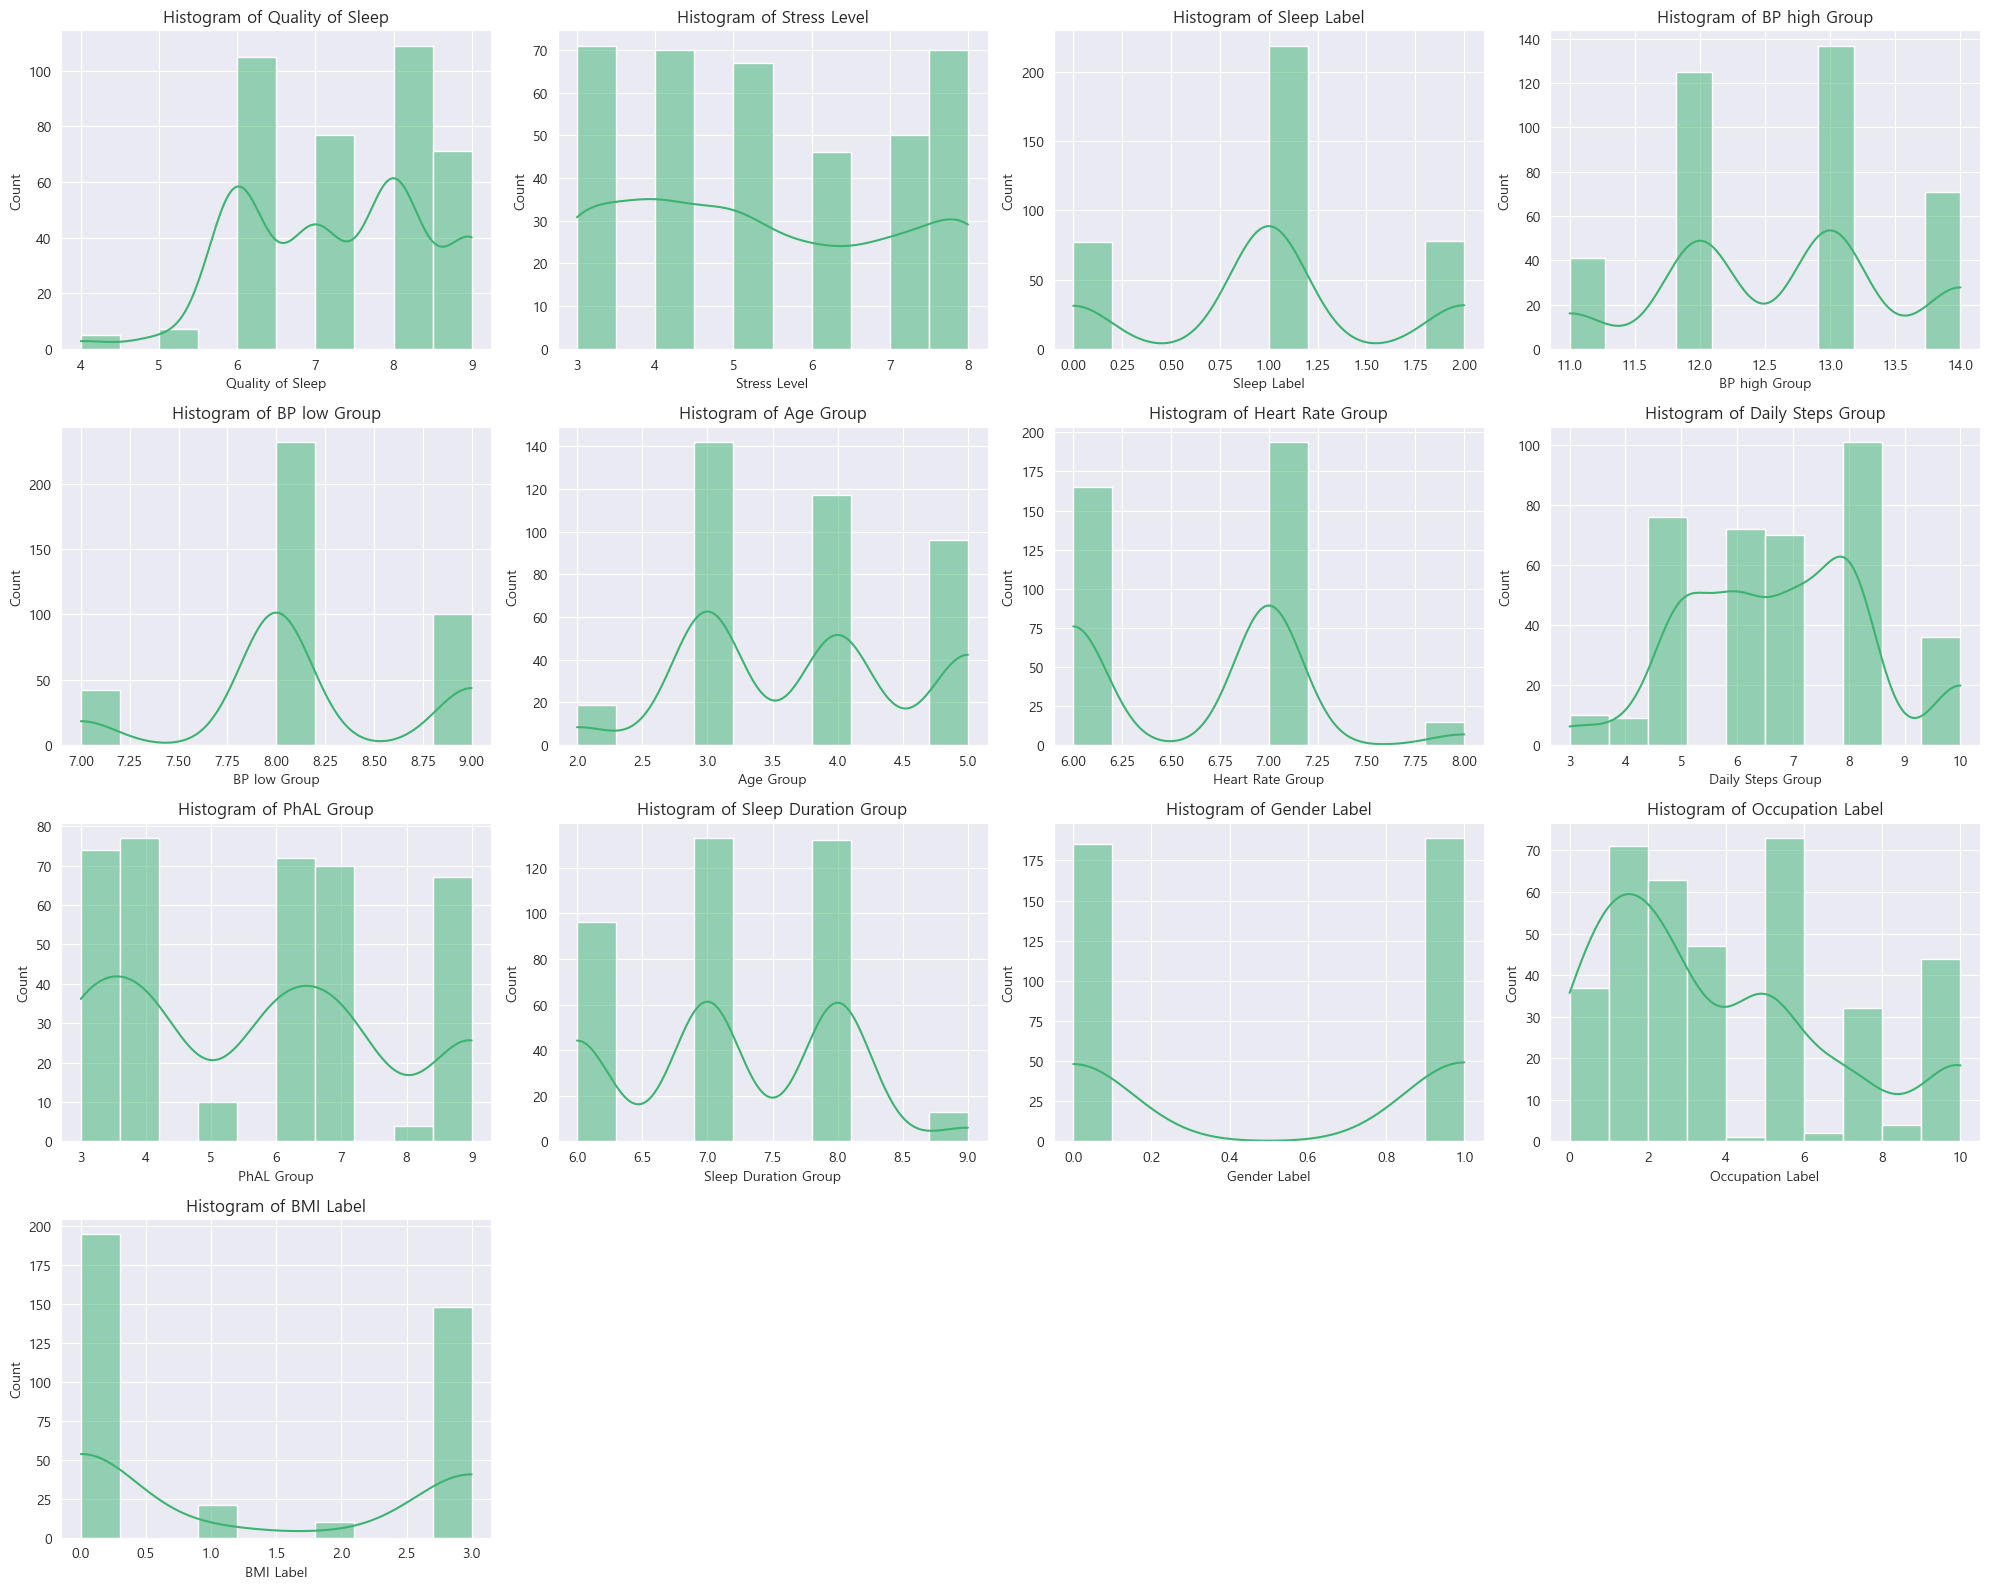

In [49]:
num_cols = ["Quality of Sleep", "Stress Level", "Sleep Label", "BP high Group", "BP low Group", "Age Group", "Heart Rate Group", "Daily Steps Group", "PhAL Group", "Sleep Duration Group", "Gender Label", "Occupation Label", "BMI Label"]
n = len(num_cols)
rows = (n // 4) + (n % 4 > 0)
plt.figure(figsize=(20, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 4, i)
    sns.histplot(df[col], kde=True, color='mediumseagreen')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

### 변수 전체 히트맵

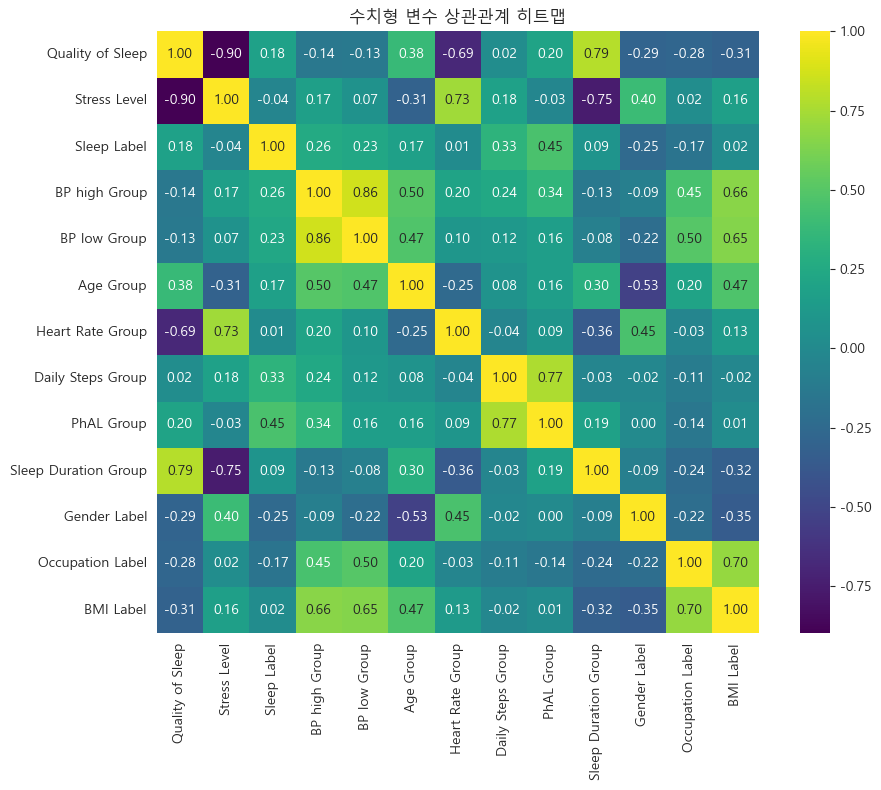

In [50]:
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title("수치형 변수 상관관계 히트맵")
plt.tight_layout()
plt.show()

### 주요 변수

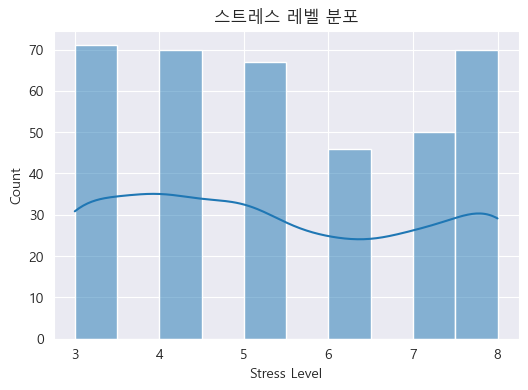

In [51]:
# Stress Level 분포
plt.figure(figsize=(6, 4))
sns.histplot(df['Stress Level'], bins=10, kde=True)
plt.title("스트레스 레벨 분포")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

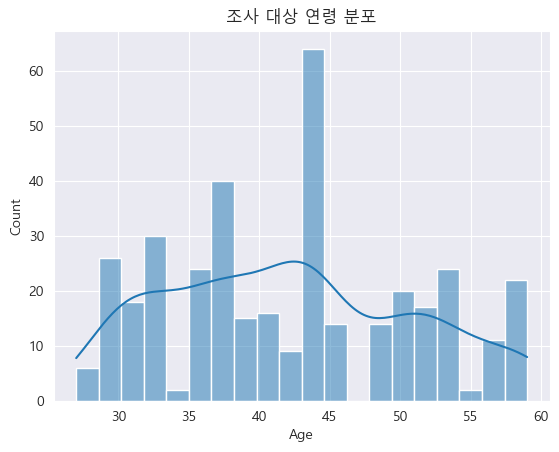

In [52]:
# 조사 대상 연령 분포
# 히스토그램 & 도수분포표(KDE)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('조사 대상 연령 분포')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

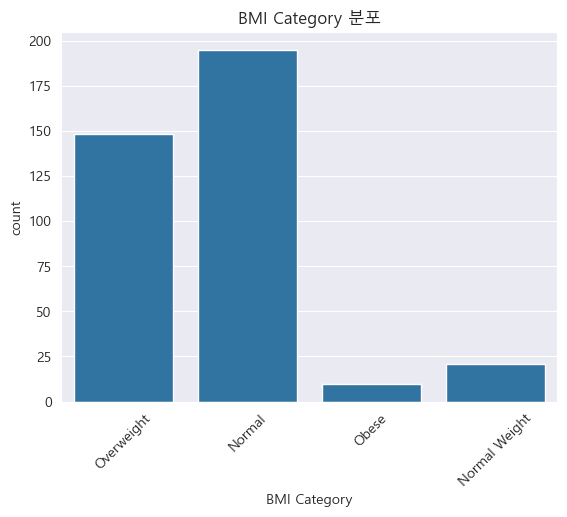

In [53]:
# BMI Category 분포
# Normal Weight 어떻게 전처리 할 것 인지에 따라 시각화 달라짐!!
# 범주형 변수 분포 (막대그래프)
sns.countplot(data=df, x='BMI Category')
plt.title('BMI Category 분포')
plt.xticks(rotation=45)
plt.colormaps()
plt.show()

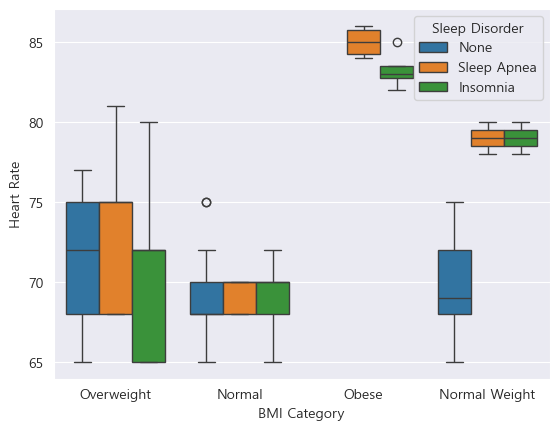

In [54]:
# 박스플롯 그리기
sns.boxplot(data=df, x='BMI Category', y='Heart Rate', hue='Sleep Disorder')
plt.show()
# BMI가 수면장애와 심장박동 수에 미치는 영향

## 06. 변수간 관계 시각화

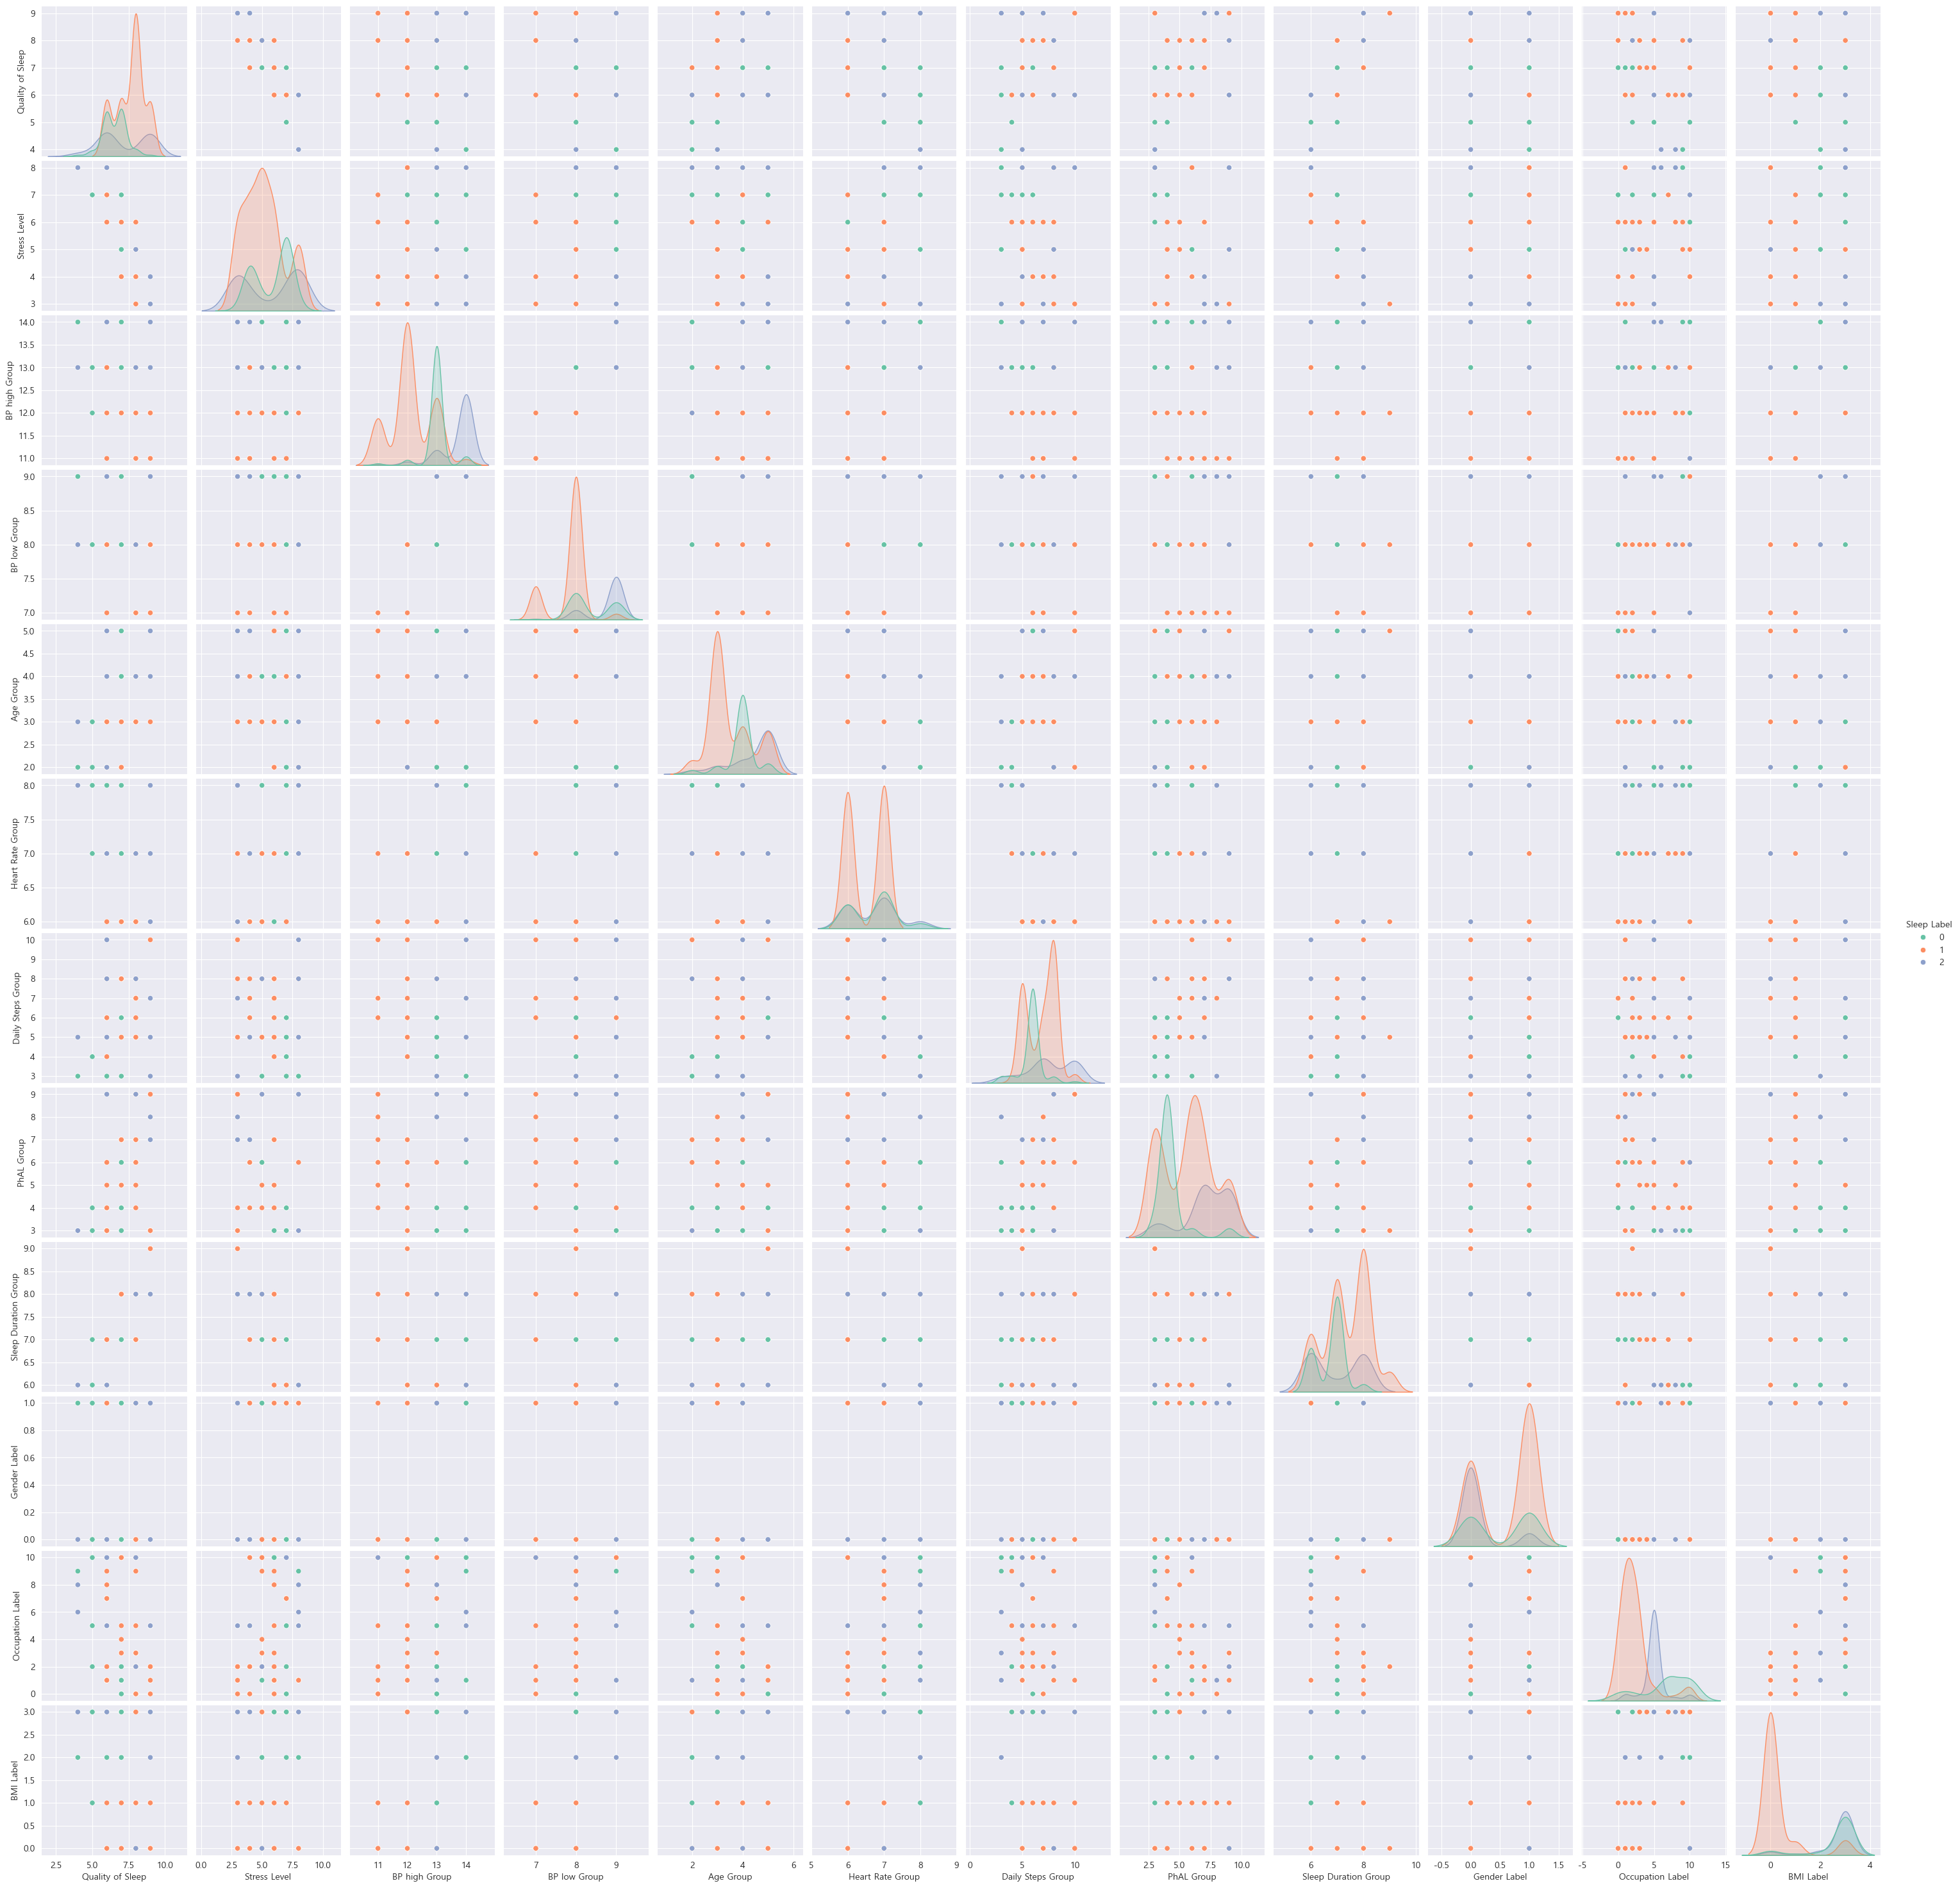

In [57]:
# 전체 변수간의 관계파악을 위한 scatterplot
sns.pairplot(data=df[num_cols], hue='Sleep Label', palette='Set2')
plt.show()

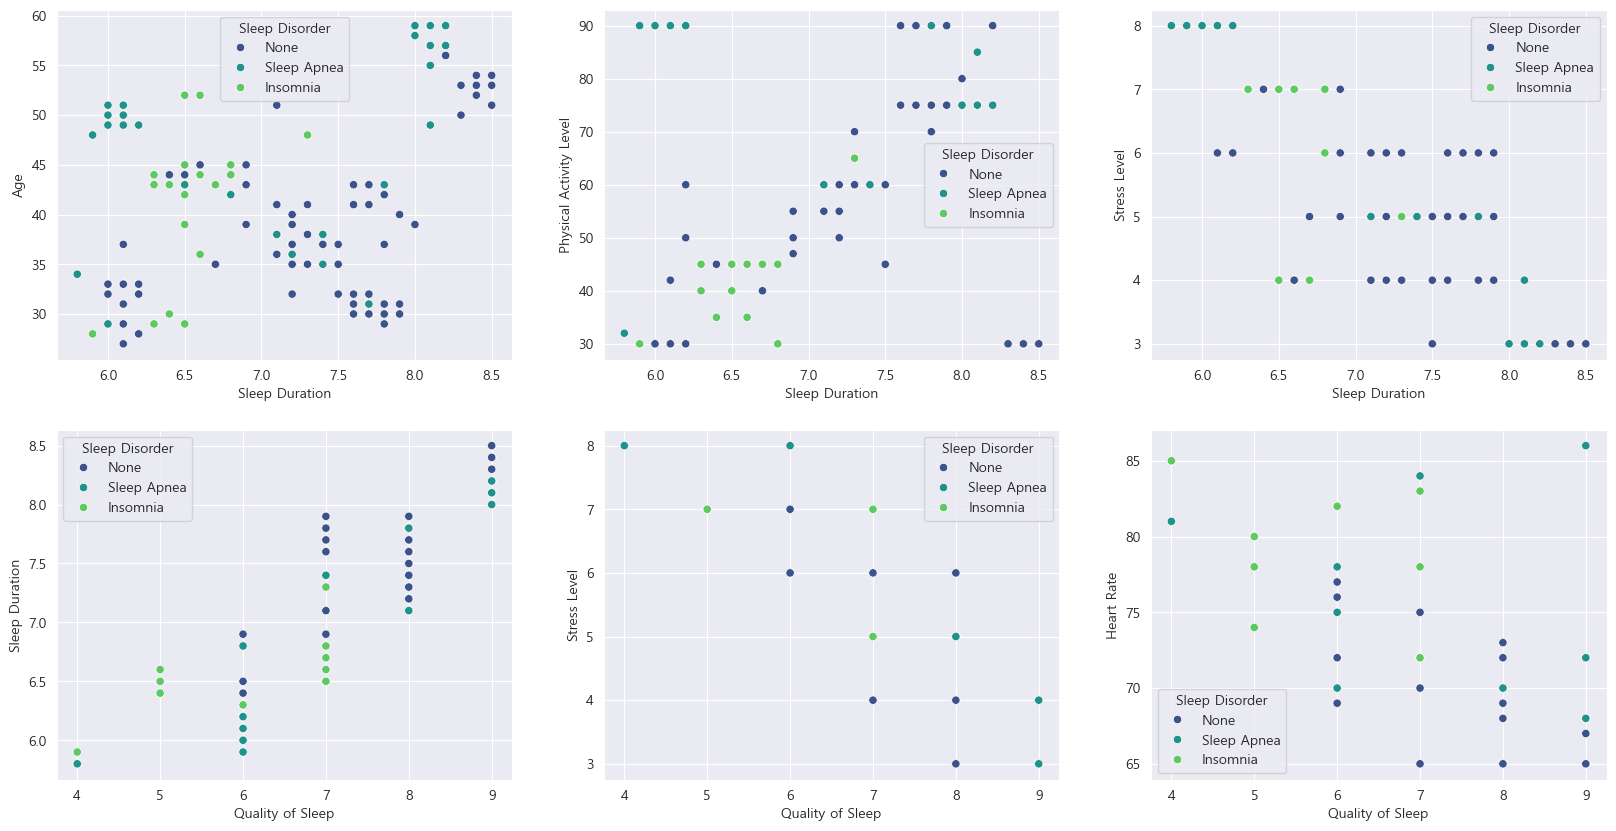

In [59]:
# 전체 scatterplot을 보고 상관관계가 있어보이는 변수들을 추려서 표현
_, ax = plt.subplots(2, 3, figsize=(20, 10))
# 불면증은 수면지속시간이 길지 않다.

sns.scatterplot(data=df, x='Sleep Duration', y='Age', ax=ax[0][0], hue = 'Sleep Disorder' ,palette='viridis')
sns.scatterplot(data=df, x='Sleep Duration', y='Physical Activity Level', ax=ax[0][1], hue = 'Sleep Disorder' ,palette='viridis')
sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level', ax=ax[0][2], hue = 'Sleep Disorder' ,palette='viridis')
sns.scatterplot(data=df, x='Quality of Sleep', y='Sleep Duration', ax=ax[1][0], hue = 'Sleep Disorder' ,palette='viridis')
sns.scatterplot(data=df, x='Quality of Sleep', y='Stress Level', ax=ax[1][1], hue = 'Sleep Disorder' ,palette='viridis')
sns.scatterplot(data=df, x='Quality of Sleep', y='Heart Rate', ax=ax[1][2], hue = 'Sleep Disorder' ,palette='viridis')
plt.show()

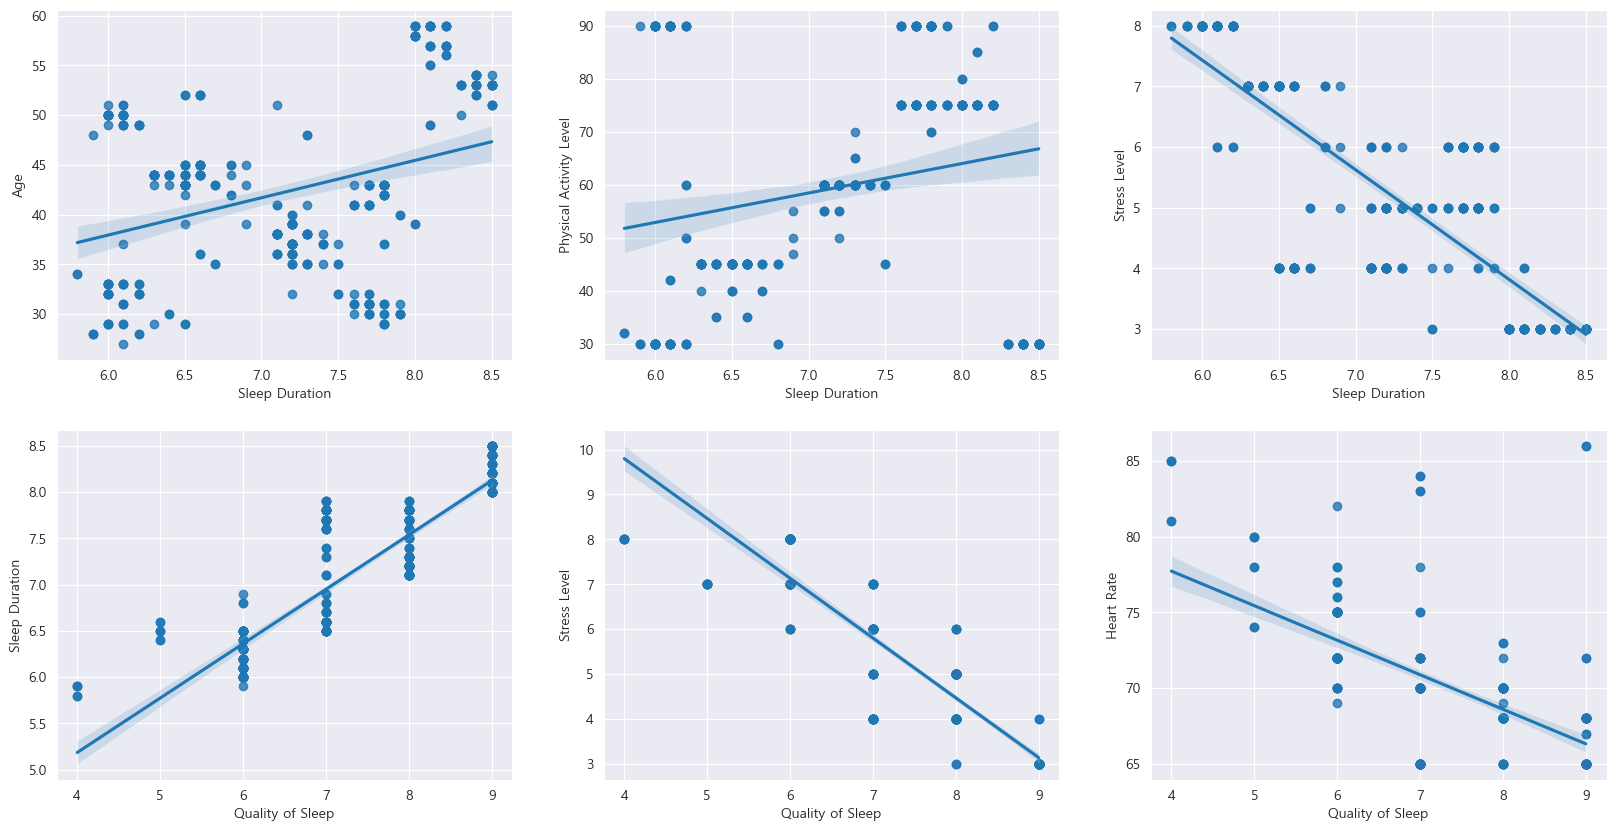

In [60]:
_, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.regplot(data=df, x='Sleep Duration', y='Age', ax=ax[0][0])
sns.regplot(data=df, x='Sleep Duration', y='Physical Activity Level', ax=ax[0][1])
sns.regplot(data=df, x='Sleep Duration', y='Stress Level', ax=ax[0][2])
sns.regplot(data=df, x='Quality of Sleep', y='Sleep Duration', ax=ax[1][0])
sns.regplot(data=df, x='Quality of Sleep', y='Stress Level', ax=ax[1][1])
sns.regplot(data=df, x='Quality of Sleep', y='Heart Rate', ax=ax[1][2])
plt.show()

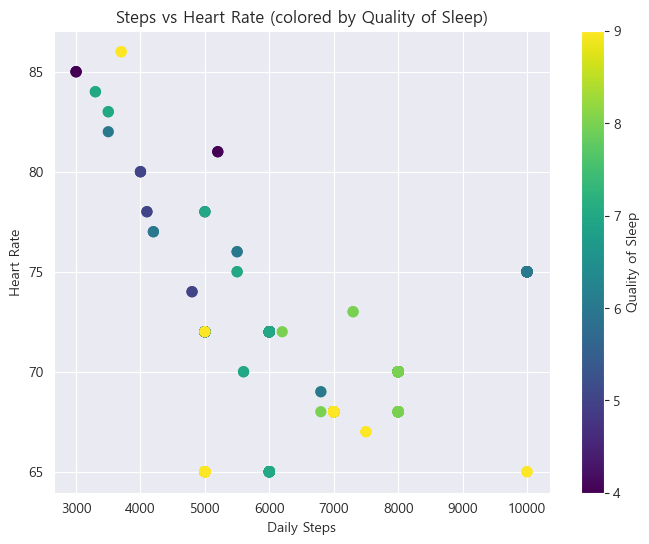

In [61]:
# 심장박동과 일일 걸음수가 수면의 질에 끼치는 영향
# 걸음을 많이 걸은 사람들이 혈압도 좋고 잠의 퀄리티도 좋다.
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Daily Steps'], df['Heart Rate'],
                      c=df['Quality of Sleep'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Quality of Sleep')
plt.xlabel('Daily Steps')
plt.ylabel('Heart Rate')
plt.title('Steps vs Heart Rate (colored by Quality of Sleep)')
plt.show()

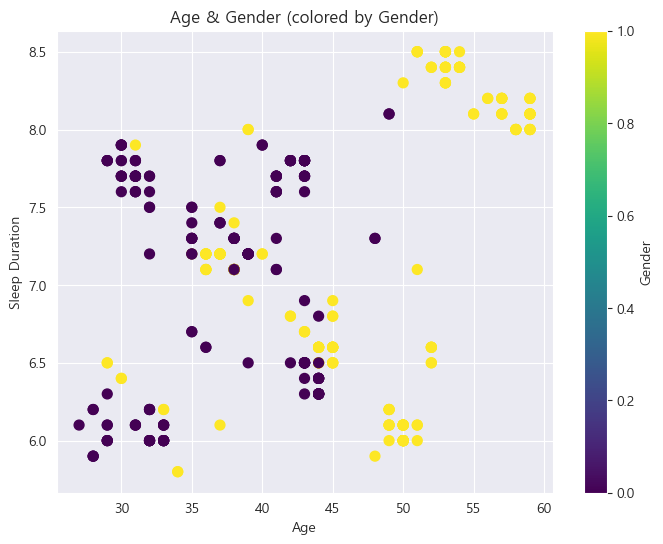

In [62]:
# 나이, 성별에 따른 수면시간 상세 비교
df['Gender_code'] = df['Gender'].map({'Male': 0, 'Female': 1})

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Age'], df['Sleep Duration'],
                      c=df['Gender_code'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Gender')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Age & Gender (colored by Gender)')
plt.show()

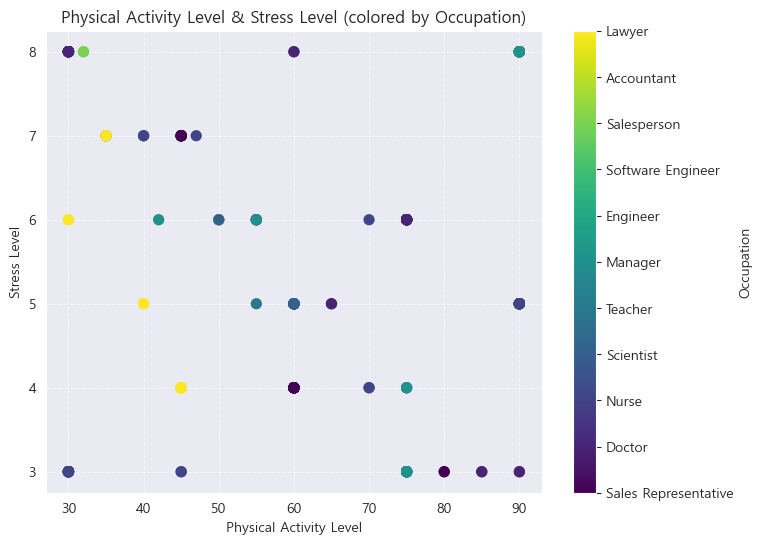

In [63]:
# 직업에 따른 활동량과 스트레스 관계
# 수치화
le = LabelEncoder()
df['Occupation_encoded'] = le.fit_transform(df['Occupation'])

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Physical Activity Level'], df['Stress Level'],
                      c=df['Occupation_encoded'], cmap='viridis', s=50)
# 컬러바 추가 및 설정
cbar = plt.colorbar(scatter) # 컬러바 객체를 변수에 할당
cbar.set_label('Occupation') # 컬러바의 전체 레이블 (제목)

# 컬러바의 눈금(ticks)과 레이블(labels)을 원본 직업 이름으로 설정
# 눈금 위치는 0, 1, 2... (인코딩된 숫자)
cbar.set_ticks(df['Occupation_encoded'].unique()) # 인코딩된 고유 숫자들을 눈금 위치로 설정
cbar.set_ticklabels(le.classes_) # 해당 눈금 위치에 원본 직업 이름을 레이블로 설정

plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.title('Physical Activity Level & Stress Level (colored by Occupation)')
plt.grid(True, linestyle='--', alpha=0.6) # 그리드 추가
plt.show()

## 07. 상관관계 및 교차분석
- 연속형 데이터 : 상관계수
- 범주형 데이터 : 교차표

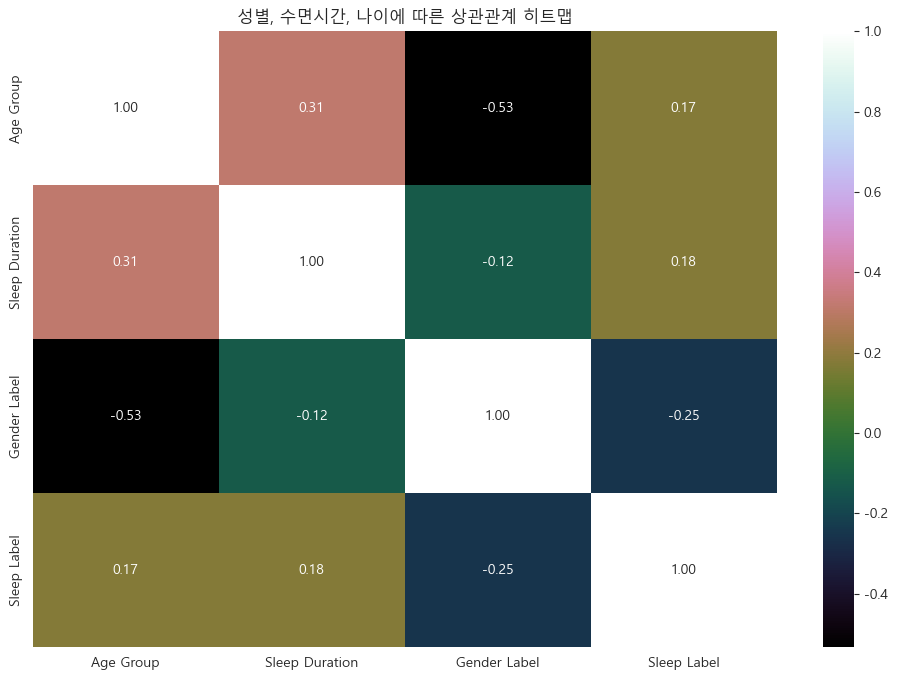

In [66]:
# 상관관계 히트맵 (1)
numeric_cols = ['Age Group', 'Sleep Duration','Gender Label', 'Sleep Label']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='cubehelix', fmt='.2f')
plt.title('성별, 수면시간, 나이에 따른 상관관계 히트맵')
plt.show()

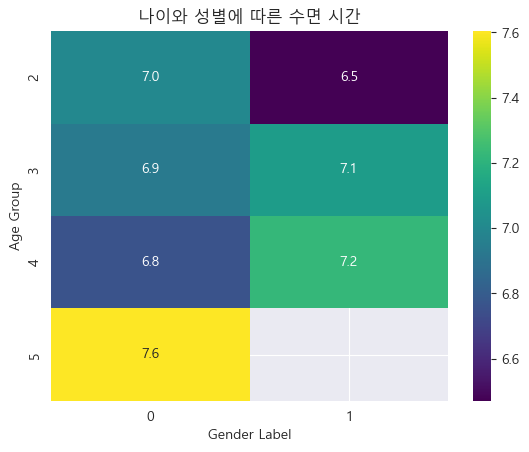

In [67]:
pivot = df.pivot_table(index='Age Group', columns='Gender Label', values='Sleep Duration Group', observed=True)
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='viridis')
plt.title('나이와 성별에 따른 수면 시간')
plt.show()

In [68]:
# 교차표 출력
print(pd.crosstab(df['Age Group'], df['Sleep Duration Group']))

Sleep Duration Group   6   7   8   9
Age Group                           
2                     13   2   4   0
3                     32  72  38   0
4                     29  52  36   0
5                     22   7  54  13


In [70]:
# 두 변수간 교차분석
pivot_age_pclass = df.pivot_table(index='Age Group', columns='Gender', values='Sleep Duration Group')
pivot_disorder_pclass = df.pivot_table(index='Sleep Label', columns='Gender', values='Sleep Duration', aggfunc='mean')
display(pivot_age_pclass)
display(pivot_disorder_pclass)

Gender,Female,Male
Age Group,,
2,7.000000,6.470588
3,6.933333,7.092784
4,6.761905,7.226667
5,7.604167,NaN


Gender,Female,Male
Sleep Label,,
0,6.633333,6.551220
1,7.650000,7.183942
2,7.035821,7.009091


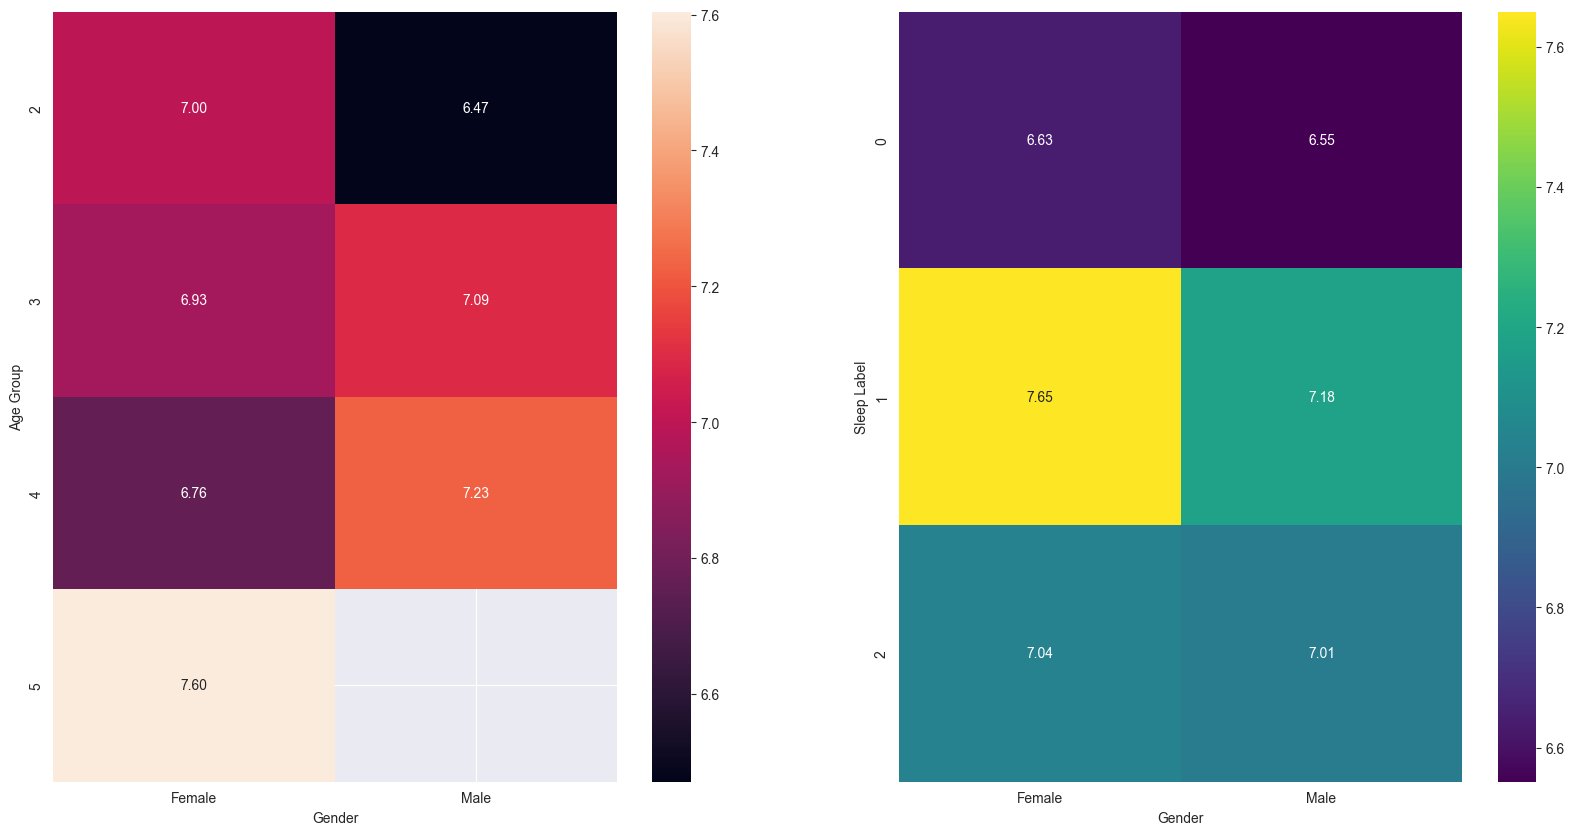

In [71]:
# 히트맵
_, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(pivot_age_pclass, annot=True, fmt='.2f', ax=ax[0])
sns.heatmap(pivot_disorder_pclass, annot=True, fmt='.2f', ax=ax[1], cmap='viridis')
plt.show()

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


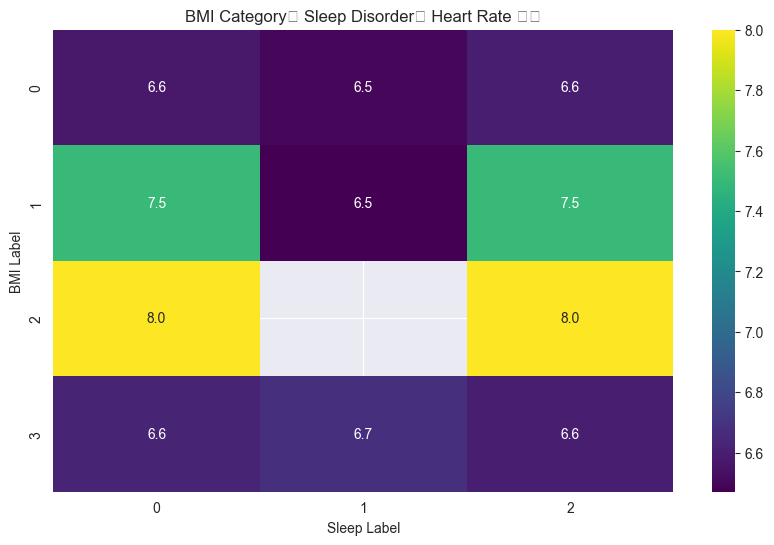

In [72]:
pivot = df.pivot_table(index='BMI Label', columns='Sleep Label', values='Heart Rate Group', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='viridis')
plt.title('BMI Category와 Sleep Disorder별 Heart Rate 평균')
plt.show()

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47049 

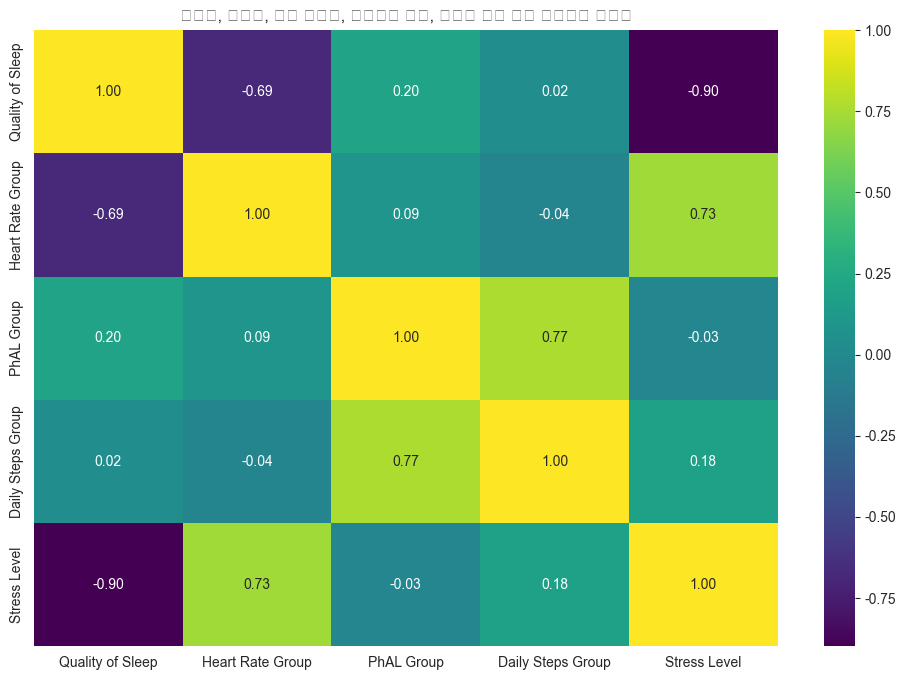

In [73]:
# 상관관계 히트맵 (3)
numeric_cols = ['Quality of Sleep', 'Heart Rate Group','PhAL Group', 'Daily Steps Group', 'Stress Level']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('박동수, 활동량, 일일 걸음수, 스트레스 정도, 수면의 질에 따른 상관관계 히트맵')
plt.show()

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44152 (\N{HANGUL SYLLABLE GEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51020 (\

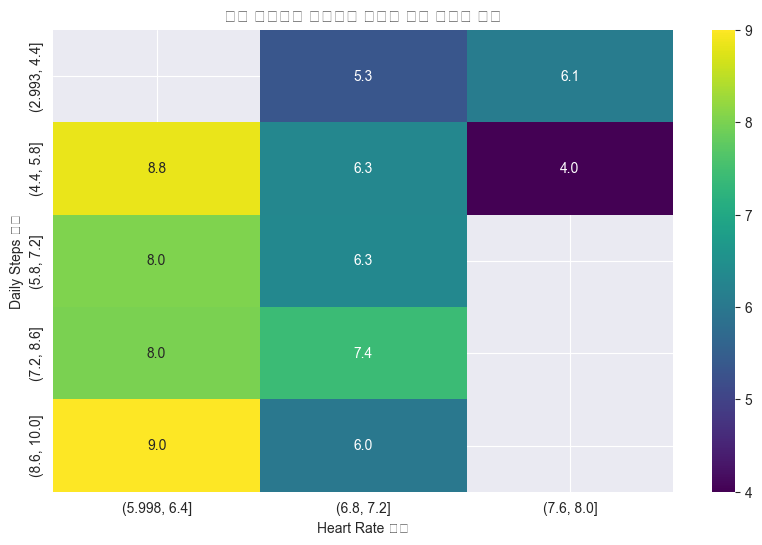

In [74]:
df['Steps_bin'] = pd.cut(df['Daily Steps Group'], bins=5)
df['HR_bin'] = pd.cut(df['Heart Rate Group'], bins=5)

# 피벗테이블
pivot = df.pivot_table(index='Steps_bin', columns='HR_bin', values='Quality of Sleep', aggfunc='mean',observed=True)

# 히트맵
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='viridis')
plt.title('일일 걸음수와 심박수가 수면의 질에 미치는 영향')
plt.xlabel('Heart Rate 구간')
plt.ylabel('Daily Steps 구간')
plt.show()

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47732 (

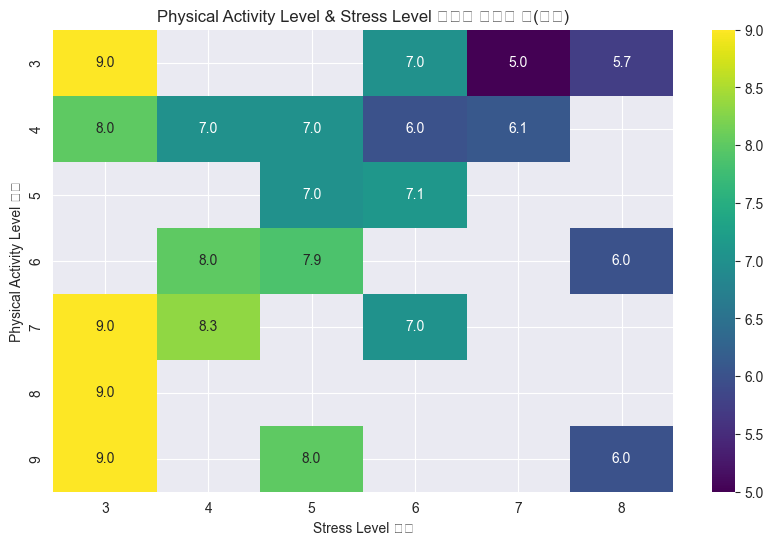

In [75]:
pivot = df.pivot_table(index='PhAL Group', columns='Stress Level', values='Quality of Sleep', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='viridis')
plt.title('Physical Activity Level & Stress Level 구간별 수면의 질(평균)')
plt.xlabel('Stress Level 구간')
plt.ylabel('Physical Activity Level 구간')
plt.show()

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47732 (

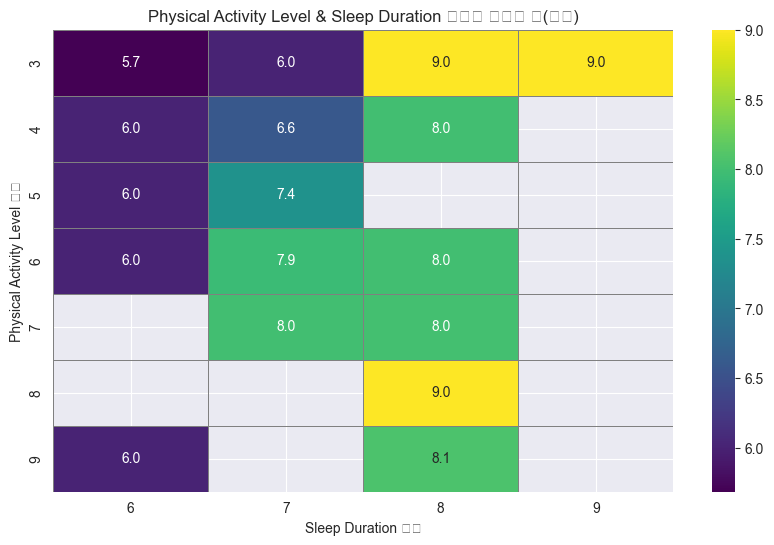

In [76]:
pivot = df.pivot_table(
    index='PhAL Group',
    columns='Sleep Duration Group',
    values='Quality of Sleep',
    aggfunc='mean',
    observed=True
)

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Physical Activity Level & Sleep Duration 구간별 수면의 질(평균)')
plt.xlabel('Sleep Duration 구간')
plt.ylabel('Physical Activity Level 구간')
plt.show()

## 감상
- 데이터 분석은 정해진 순서나 정해진 방식을 따르지 않았을 때 더 좋은 의미들이 발견될 수도 있다.
- 전처리와 Feature Engineering 이 과하면 데이터가 본래의 의미를 잃을 수 있다.
- 시각화를 했을 때 오히려 헷갈릴 수도 있다.